In [60]:
import numpy as np
from scipy.misc import derivative
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set()

In [61]:
func = lambda x: x**3 + 0.2 * x**2 + 0.5 * x - 1.2

<IPython.core.display.Javascript object>


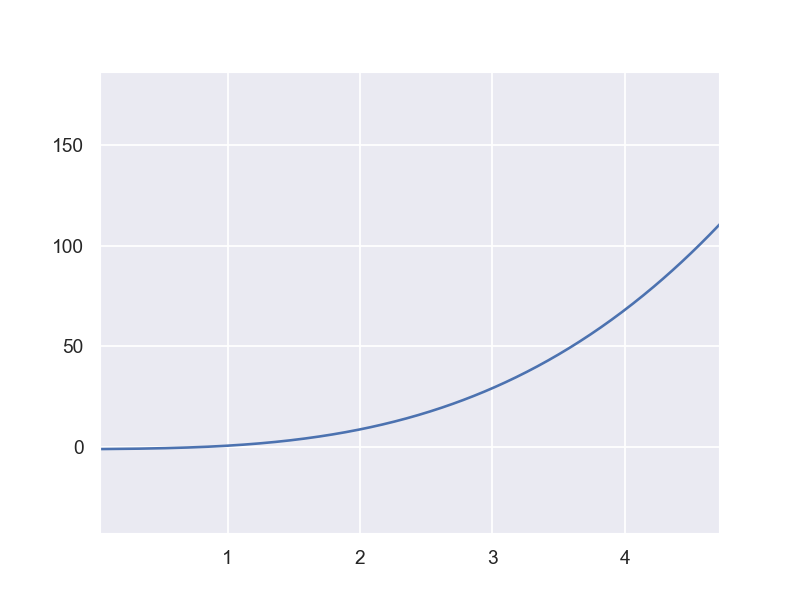

In [62]:
a1 = 0
a2 = 0
while True: 
    if func(a1)* func(a1+1) < 0:
        a = a1
        b = a1 + 1
        break
    if func(a2)* func(a2-1) < 0:
        a = a1
        b = a1 - 1
        break
    a1 = a1 + 1
    a2 = a2 - 1
a, b

x = np.arange(-10, 10.01, 0.01)
plt.plot(x, func(x))


In [45]:
k = 0
df = pd.DataFrame(columns = ['a', 'b', 'x', '|a - b|'])
while np.abs(a - b) > 0.0001:
    k += 1
    if np.sign(func((a + b)/2)) == np.sign(func(a)):
        a = (a + b)/2
        x = a
        df.loc[len(df)] = [a, b, x, np.abs(a - b)]
    else:
        b = (a + b)/2
        x = b
        df.loc[len(df)] = [a, b, x, np.abs(a - b)]
        
print('k =', k) 
print(a,b)
print(x)
df

k = 14
0.85540771484375 0.85546875
0.85540771484375


,a,b,x,|a - b|
0,0.500000,1.000000,0.500000,0.500000
1,0.750000,1.000000,0.750000,0.250000
2,0.750000,0.875000,0.875000,0.125000
3,0.812500,0.875000,0.812500,0.062500
4,0.843750,0.875000,0.843750,0.031250
5,0.843750,0.859375,0.859375,0.015625
6,0.851562,0.859375,0.851562,0.007812
7,0.851562,0.855469,0.855469,0.003906
8,0.853516,0.855469,0.853516,0.001953
9,0.854492,0.855469,0.854492,0.000977


In [46]:
a,b = (0,1)
k = 0
x = a - func(a)*(b-a)/(func(b) - func(a))
df = pd.DataFrame(columns = ['b', 'x_k-1', 'x_k', '|x_k - x_k-1|'])
print('x_0 =',x)

while True:
    k += 1
    if func(a) * derivative(func, n=2, x0=a) > 0:
        x_n = x - func(x)*(x-a)/(func(x) - func(a))
        df.loc[len(df)] = [a, x, x_n, np.abs(x - x_n)]
        if np.abs(x - x_n) < 0.0001:
            x = x_n
            break
        x = x_n
    elif func(b) * derivative(func, n=2, x0=b) > 0:
        x_n = x - func(x)*(x-b)/(func(x) - func(b))
        df.loc[len(df)] = [b, x, x_n, np.abs(x - x_n)]
        if np.abs(x - x_n) < 0.0001:
            x = x_n
            break
        x = x_n
        
print('k =', k) 
print('x =', x)
df

x_0 = 0.7058823529411765
k = 5
x = 0.8554134810322925


,b,x_k-1,x_k,|x_k - x_k-1|
0,1.0,0.705882,0.835814,0.129932
1,1.0,0.835814,0.853009,0.017195
2,1.0,0.853009,0.855124,0.002116
3,1.0,0.855124,0.855382,0.000258
4,1.0,0.855382,0.855413,0.000031


In [47]:
k = 0
df = pd.DataFrame(columns = ['x_k-1', 'x_k', "|f(x_k-1)/f'(x_k-1)|"])

if func(a) * derivative(func, n=2, x0=a) > 0:
    x = a      
elif func(b) * derivative(func, n=2, x0=b) > 0:
    x = b

print('x_0 =',x)

while np.abs(func(x)/derivative(func, n=1, x0=x)) > 0.0001:
    k += 1
    x_1 = x
    x = x - func(x)/derivative(func, n=1, x0=x)
    df.loc[len(df)] = [x_1, x, np.abs(func(x)/derivative(func, n=1, x0=x))]
    
print('k =', k)   
print('x =',x)
df

x_0 = 1
k = 6
x = 0.8554606608908345


,x_k-1,x_k,|f(x_k-1)/f'(x_k-1)|
0,1.000000,0.897959,0.031391
1,0.897959,0.866568,0.008346
2,0.866568,0.858222,0.002107
3,0.858222,0.856115,0.000524
4,0.856115,0.855591,0.000130
5,0.855591,0.855461,0.000032


In [51]:
f_i = lambda x: (1.2 - 0.2 * x**2 - 0.5 * x) ** (1/3)
k = 0
df = pd.DataFrame(columns = ['x_k-1', 'x_k', "|x_k - x_k-1|"])

if np.abs(derivative(f_i, n=1, x0=a)) > 0:
    x = a      
elif np.abs(derivative(f_i, n=1, x0=b)) > 0:
    x = b

print(np.abs(derivative(f_i, n=1, x0=a)))
print(np.abs(derivative(f_i, n=1, x0=b)))
print('x =',x)

while True:
    k += 1
    x_n = f_i(x)
    if np.abs(x - x_n) <= 0.0001:
        df.loc[len(df)] = [x, x_n, np.abs(x - x_n)]
        x = x_n
        break
    df.loc[len(df)] = [x, x_n, np.abs(x - x_n)]
    x = x_n
print('k =', k)
print('x =',x)
df

0.17550685828461604
0.48588603248185
x = 0
k = 11
x = 0.8554338756720222


,x_k-1,x_k,|x_k - x_k-1|
0,0.000000,1.062659,1.062659
1,1.062659,0.762213,0.300445
2,0.762213,0.889044,0.126831
3,0.889044,0.842212,0.046832
4,0.842212,0.860439,0.018227
5,0.860439,0.853485,0.006954
6,0.853485,0.856158,0.002673
7,0.856158,0.855134,0.001025
8,0.855134,0.855527,0.000393
9,0.855527,0.855376,0.000151
